In [1]:
#Summary: The project implemented Hybrid Long Short Term Memory (LSTM) to prognosticate the closing stock price on
#short intervals. The company for evaluation is Air Canada on (TSX), Canadian market.

# Wilfredo Tovar Hidalgo
#  School of Information Technology
#  Carleton University
#  Ottawa, Canada
#  wilfredotovarhidalgo@cmail.carleton.ca

#Importing the libraries required

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
#Employing stock results from January, 2012 to July, 2018.
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2018-07-01') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2018-06-25,184.919998,180.729996,183.399994,182.169998,31663100.0,177.802338
2018-06-26,186.529999,182.539993,182.990005,184.429993,24569200.0,180.008163
2018-06-27,187.279999,184.029999,185.229996,184.160004,25285300.0,179.744629


In [3]:
#Illustration of dataset
df.shape

(1634, 6)

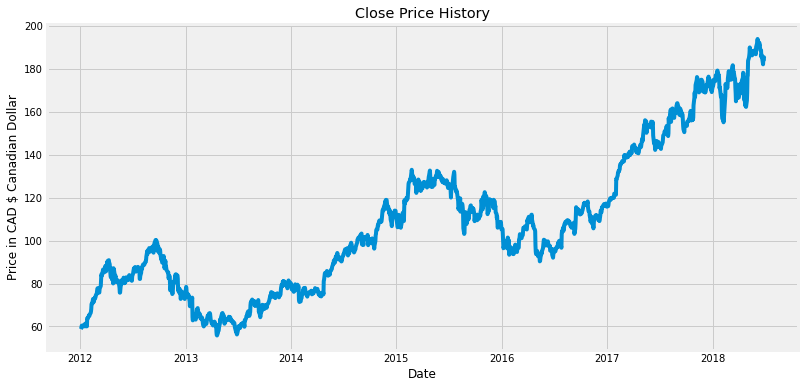

In [4]:
#Visualization the closing price records
plt.figure(figsize=(12,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price in CAD $ Canadian Dollar',fontsize=12)
plt.show()
#PROFESSOR HERE YOU CAN SEE THE CLOSING PRICES, IT MIUCH MORE BETTER USE DATA FROM PREVIOUS YEARS SINCE IN 2020 THE MARKET HAD TO STOP DUE TO SEVERAL CRISIS

In [5]:
#Produce a new dataframe
data = df.filter(['Close'])

#Transforming the dataframe to a numpy array
# TIMESSCONVERSION()
dataset = data.values

#Obtain/Estimate the amount of rows to train the model
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

1308

In [6]:
#Scale the all of the data
TIMESSCONVERSION = MinMaxScaler(feature_range=(0, 1))
scaled_data = TIMESSCONVERSION.fit_transform(dataset)
scaled_data
#**********PROFESSOR AS YOU CAN SEE HERE IT HAVE TO SHOWS A RANGE OF VALUES BETWEEN 0 TO 1************

array([[0.0213991 ],
       [0.02368375],
       [0.02842876],
       ...,
       [0.92893847],
       [0.93863524],
       [0.93581304]])

In [10]:
#Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#NTIMESTEPS Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(30,len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

[array([0.0213991 , 0.02368375, 0.02842876, 0.03294635, 0.03225372,
       0.03381472, 0.03310141, 0.03190223, 0.03026889, 0.03532403,
       0.03988298, 0.03847704, 0.03077544, 0.03812555, 0.03088914,
       0.05802569, 0.05592712, 0.05866665, 0.06459015, 0.06817733,
       0.06787754, 0.06677142, 0.07148543, 0.07592029, 0.08094446,
       0.08905959, 0.1061065 , 0.10636494, 0.115855  , 0.12294666])]
[0.1107584515050346]

[array([0.0213991 , 0.02368375, 0.02842876, 0.03294635, 0.03225372,
       0.03381472, 0.03310141, 0.03190223, 0.03026889, 0.03532403,
       0.03988298, 0.03847704, 0.03077544, 0.03812555, 0.03088914,
       0.05802569, 0.05592712, 0.05866665, 0.06459015, 0.06817733,
       0.06787754, 0.06677142, 0.07148543, 0.07592029, 0.08094446,
       0.08905959, 0.1061065 , 0.10636494, 0.115855  , 0.12294666]), array([0.02368375, 0.02842876, 0.03294635, 0.03225372, 0.03381472,
       0.03310141, 0.03190223, 0.03026889, 0.03532403, 0.03988298,
       0.03847704, 0.03077544, 0.0

In [0]:
#Convert x_train and y_train to numpy arrays
#Training
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
#Reshape the data into the shape accepted by the LSTM
#WE NEED THIS BECAUSE LSTM EXPECT THE INPUT BE 3 DIMENSIONAL AND X_TRAIN IS TWO DIMENSIONAL
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape
#********Professor here below you can see one the transformation from a bidimentional data set to threedimentional******

(1278, 30, 1)

In [0]:
#Building my model the LSTM network model: here you can see the LAYERS
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape= (x_train.shape[1],1))) #THESE ARE THE LAYERS
model.add(LSTM(units=20, return_sequences=False))
model.add(Dense(units=15))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
#Train the model
#Professor this is the training process it may take time depending of the information that we use.
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1278/1278 [==============================] - 25s 20ms/step - loss: 0.0015


In [0]:
#Formation of Testing data set
#It will be the scaling testing data set 
test_data = scaled_data[training_data_len - 30: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [0]:
#ADDITION REFINED TO AR-LSTM

#Convert x_test to a numpy array
x_test = np.array(x_test)

In [71]:
#Reshape the data into the shape accepted by the LSTM
#Professor AGAIN I had to reshape the data from bi to three dimensional to be supported by LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))


array([[[0.52796875],
        [0.52637673],
        [0.53035678],
        ...,
        [0.60358926],
        [0.60206967],
        [0.61270721]],

       [[0.52637673],
        [0.53035678],
        [0.53911278],
        ...,
        [0.60206967],
        [0.61270721],
        [0.61437155]],

       [[0.53035678],
        [0.53911278],
        [0.54808597],
        ...,
        [0.61270721],
        [0.61437155],
        [0.60930608]],

       ...,

       [[0.94543749],
        [0.95802878],
        [0.94941754],
        ...,
        [0.93443811],
        [0.91453797],
        [0.93089223]],

       [[0.95802878],
        [0.94941754],
        [0.94449672],
        ...,
        [0.91453797],
        [0.93089223],
        [0.92893847]],

       [[0.94941754],
        [0.94449672],
        [0.95404884],
        ...,
        [0.93089223],
        [0.92893847],
        [0.93863524]]])

In [0]:
#Getting the models predicted price values
#Professor to be clear: Here what i want is to obtain PREDICTIONS TO CONTAIN THE SAME VALUES AS A WIDE DATA SET, 
# So It can predict on short time price and not only for time series like the traditional alg do. 
forecasts = model.predict(x_test)
forecasts = TIMESSCONVERSION.inverse_transform(forecasts) #Undo scaling

In [75]:
#Calculate and Obtain the value
#Obtaining the root squared error
#So the value is pretty descent for prediction
rmse =np.sqrt(np.mean(((forecasts- y_test)**2)))
rmse

4.900518000764901

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


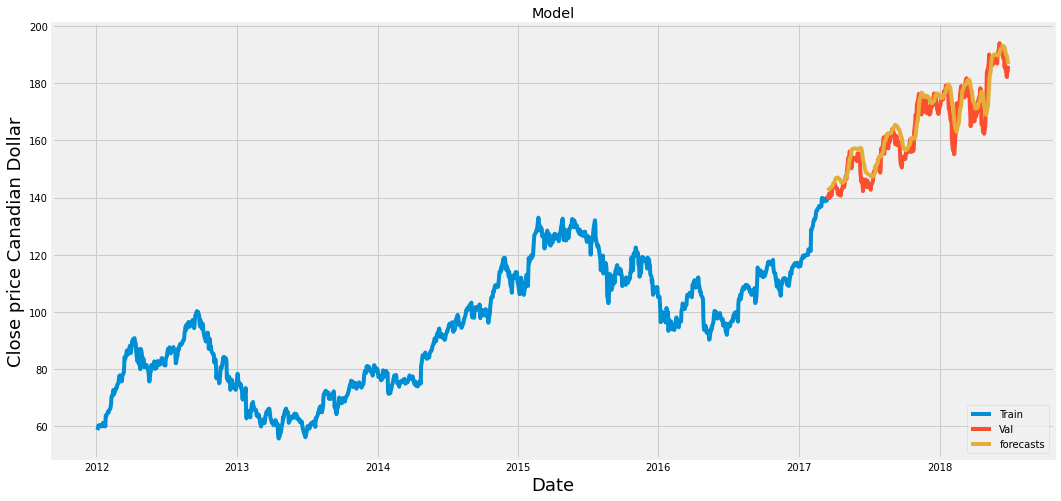

In [82]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['forecasts'] = forecasts

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price Canadian Dollar', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'forecasts']])
plt.legend(['Train', 'Val', 'forecasts'], loc='lower right')
plt.show()

In [83]:
#Illustrate the valid and predicted prices
valid

,Close,forecasts
Date,,
2017-03-16,140.690002,142.533005
2017-03-17,139.990005,142.710434
2017-03-20,141.460007,142.857574
2017-03-21,139.839996,143.089111
2017-03-22,141.419998,143.230423
...,...,...
2018-06-25,182.169998,189.583786
2018-06-26,184.429993,188.634552
2018-06-27,184.160004,187.847290
